# Business Overview

Vaccination is one of the most effective public health measures for preventing the spread of infectious diseases. In recent years, there has been the development of vaccines for other pandemics such as COVID-19. Vaccination not only helps individuals who have been immunised but also the community from the wider spread of the virus.

For this study, we are using data from a survey conducted in 2009 during the H1N1 influenza pandemic, also known as the "swine flu". This led to an estimated death toll worldwide in its first year of between 151,000 and 575,000. To reduce this, a vaccine was introduced in late 2009 alongside the seasonal flu that was already available.

The survey was used to understand the uptake of both vaccines. These included respondents sharing information on their health conditions, demographics, risk perception, and behaviours. By analyzing this dataset, we can better understand which factors influenced vaccine uptake. These insights can help healthcare professionals design more effective, targeted campaigns to improve vaccine acceptance and coverage in future pandemics.

# Business Understanding

## Problem Statement

- Public health agencies face the challenge of running vaccination campaigns with limited resources. A general, untargeted approach is inefficient and does not effectively address the unique factors that influence vaccination in different groups of people.
- The key challenge is the lack of a proactive approach to identifying individuals who are least likely to get vaccinated, and understanding the specific reasons behind their choices. This results in lower vaccination rates and poses a greater risk to public health.

## Business Objectives

### Main Objective

- The main goal is to create a data-driven strategy that increases H1N1 and seasonal flu vaccination rates by supporting targeted and personalized public health interventions.

### Specific Objectives

1. **Identify At-Risk Populations:** To accurately segment the population and predict which individuals have a high probability of remaining unvaccinated for H1N1.

2. **Understand Key Drivers:** To determine the most influential factors (e.g., opinions, behaviors, demographics, access to care) that predict vaccine hesitancy and acceptance.

3. **Optimize Resource Allocation:** To enable the strategic direction of campaign resources (funding, personnel, clinics) toward the demographic segments with the greatest need.

4. **Predict Vaccine Acceptance:** To come up with a classification model that can predict if a person will receive the H1N1 vaccine based on past behaviour.

5. **Personalize Public Health Messaging:** To inform the creation of tailored communication strategies that address the specific concerns and misconceptions of different target groups.

## Project Goals

 - The main goal of the project is to create and test a reliable binary classification model for each vaccine (H1N1 and seasonal) that predicts whether a person is likely to get vaccinated based on their survey answers.
 - A secondary goal is to study the model to give clear insights into the factors that influence these predictions.

## Success Criteria

- Model Performance: The model is successful if it gets an AUC-ROC above 0.80 and keeps a good balance between precision and recall on the test set.
- Actionable Insights: Success includes showing the top features that drive vaccination and explaining them clearly to stakeholders.

# Data Understanding

## Data Source & Description
- **Source:** This dataset is from the National 2009 H1N1 Flu Survey (NHFS), conducted by the Centers for Disease Control and Prevention (CDC). It is publicly available and commonly used in data science projects. For more info about the data follow this link: https://www.drivendata.org/competitions/66/flu-shot-learning/
  
- **Description:** The dataset has survey answers from 26,707 people in the U.S. Each row shows a person's attitudes, beliefs, and behaviors regarding the H1N1 and seasonal flu viruses and their vaccines. Our target is to predict whether a person got the H1N1 vaccine. 


- **Suitability:** This dataset is perfect for this business problem as it has many predictors that displays clearly the factors that influence one to get vaccinated or not:

    - Opinions & Knowledge: Perceived risk, effectiveness, and side effects, `h1n1_concern`, `h1n1_knowledge`.

    - Behaviors: like `behavioral_face_mask`, `behavioral_wash_hands`, and `behavioral_large_gatherings`.

    - Demographics: `Age`, `income`, `race`, `health insurance status`, and `geographic region`.

    - External Influence: Doctor's recommendations and employment in healthcare `doctor_recc_h1n1`.
 

      
By modeling this data, we can directly address the objectives of identifying at-risk populations, understanding key drivers, and informing targeted strategies.


## Initial Data Loading and Exploration

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the features and target datasets
features_df = pd.read_csv('data/training_set_features.csv')
target_df = pd.read_csv('data/training_set_labels.csv')

In [4]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
# checking if the index columns are the same in order to merge
assert features_df.index.equals(target_df.index)

In [6]:
# Merging the features and targets on the respondent_id key
df = pd.merge(features_df, target_df, on='respondent_id')

In [7]:
# the shape of the merged dataframe
df.shape

(26707, 38)

- The dataset contains 26,707 rows and 38 columns, that is  1 ID, 36 features and 2 target columns.

In [8]:
# Displaying the first 5 rows to inspect the data
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [9]:
# Getting a summary of the DataFrame including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

- 23 columns are of type float64
- 2 columns are of type int64
- 12 columns are of type object

In [10]:
# Checking for null values
df.isna().sum().to_frame().sort_values(0,ascending = False)


,0
employment_occupation,13470
employment_industry,13330
health_insurance,12274
income_poverty,4423
doctor_recc_h1n1,2160
doctor_recc_seasonal,2160
rent_or_own,2042
employment_status,1463
marital_status,1408
education,1407


- Many columns have a few hundred missing entries this is manageable.
- Columns that have extreme null values are:
    - `employment_industry` and `employment_occupation` are each missing over 13,000 entries around 50% of the data
    - `health_insurance` is missing 12,274 entries that is around 46% of the data.
    - `income_poverty` is missing over 4,400 entries
    -  `doctor_recc_h1n1` and `doctor_recc_seasonal` are missing over 2,100 entries each.
- We’ll need a smart way to fill in the missing values, because deleting those rows would throw away a lot of useful data.

In [11]:
# Generating descriptive statistics for numerical columns
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


- The min and max values for most float64 columns like `h1n1_concern`are 0 to 3, `opinion_h1n1_vacc_effective`: 1 to 5, after a bit of research we came to the conclusion this columns uses **ordinal scale** which is something like
  - 1 = `Strongly disagree`
  - 2 = `Disagree`
  - 3 = `Neutral`
  - 4 =  `Agree`
  - 5 = `Strongly agree`
    - This  is important to note **especially when deciding how to handle and encode them.**


- The means of the target variables show a significant class imbalance. Only 21.2% of respondents received the H1N1 vaccine (`h1n1_vaccine` mean = 0.212), and 46.6% received the seasonal (`vaccine seasonal_vaccine` mean = 0.466).

- This strongly validates the plan to use AUC-ROC and Precision-Recall curves for evaluation instead of accuracy.

- Also this is why we decided to focus on `h1n1_vaccine` as the target variable rather than `vaccine seasonal_vaccine` as the latter has a much lower class imbalance

In [12]:
# Descriptive stats for object columns
df.describe(include=['object'])

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


In [13]:
#  number of unique categories per column
df.select_dtypes(include='object').nunique().sort_values(ascending=False)

employment_occupation    23
employment_industry      21
hhs_geo_region           10
age_group                 5
education                 4
race                      4
income_poverty            3
employment_status         3
census_msa                3
sex                       2
marital_status            2
rent_or_own               2
dtype: int64

- The number of unique categories per column is reasonable, but encoding them will increase complexity

- `employment_industry` and `employment_occupation` have 21 and 23 unique categories, respectively.

- `hhs_geo_region` has 10 unique codes.


## Exploratory Data Analysis (EDA)

### Univariate Analysis

**What  is the distribution of the two target variables?**

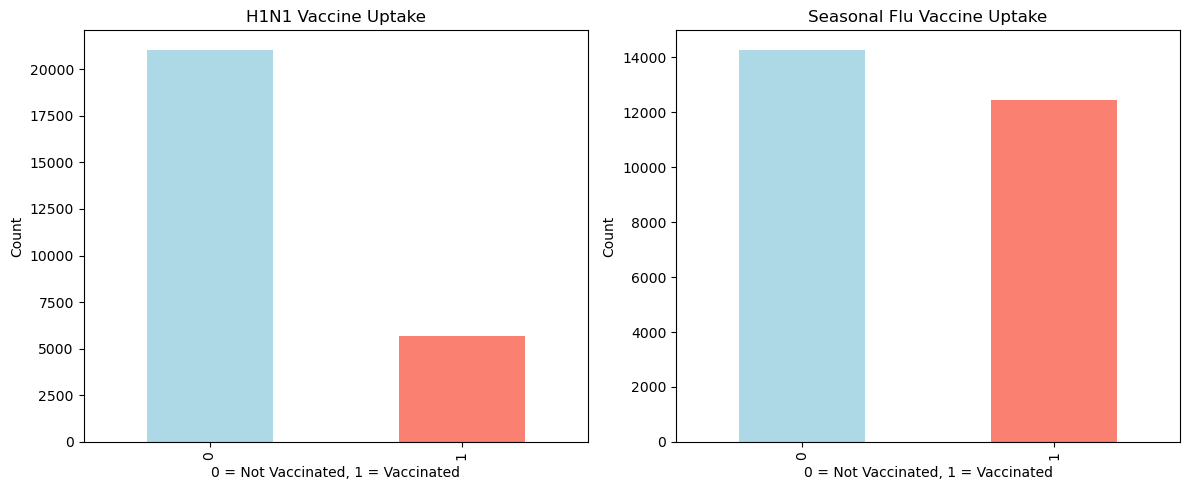

H1N1 Vaccine: 21.25% vaccinated.
Seasonal Vaccine: 46.56% vaccinated.


In [14]:
# Plot distribution of vaccine uptake
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# H1N1 Vaccine
df['h1n1_vaccine'].value_counts().plot(
    kind='bar', color=['lightblue', 'salmon'], ax=axes[0]
)
axes[0].set_title('H1N1 Vaccine Uptake')
axes[0].set_xlabel('0 = Not Vaccinated, 1 = Vaccinated')
axes[0].set_ylabel('Count')

# Seasonal Vaccine
df['seasonal_vaccine'].value_counts().plot(
    kind='bar', color=['lightblue', 'salmon'], ax=axes[1]
)
axes[1].set_title('Seasonal Flu Vaccine Uptake')
axes[1].set_xlabel('0 = Not Vaccinated, 1 = Vaccinated')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Print percentages
print(f"H1N1 Vaccine: {df['h1n1_vaccine'].mean() * 100:.2f}% vaccinated.")
print(f"Seasonal Vaccine: {df['seasonal_vaccine'].mean() * 100:.2f}% vaccinated.")


#### Observation on Class Balance:

- **H1N1 Vaccine:** Only 21.2% of respondents got the H1N1 vaccine, showing a strong imbalance. A model that always predicts “not vaccinated” would be 79% accurate but unhelpful. This means we should use metrics like AUC-ROC, F1-score, and Precision-Recall curves instead of accuracy.

- **Seasonal Flu Vaccine:** About 46.6% of respondents got the seasonal flu vaccine, showing a mild imbalance. Accuracy is still misleading, so AUC-ROC is a better choice for evaluation.

**What is the distribution of key features?**

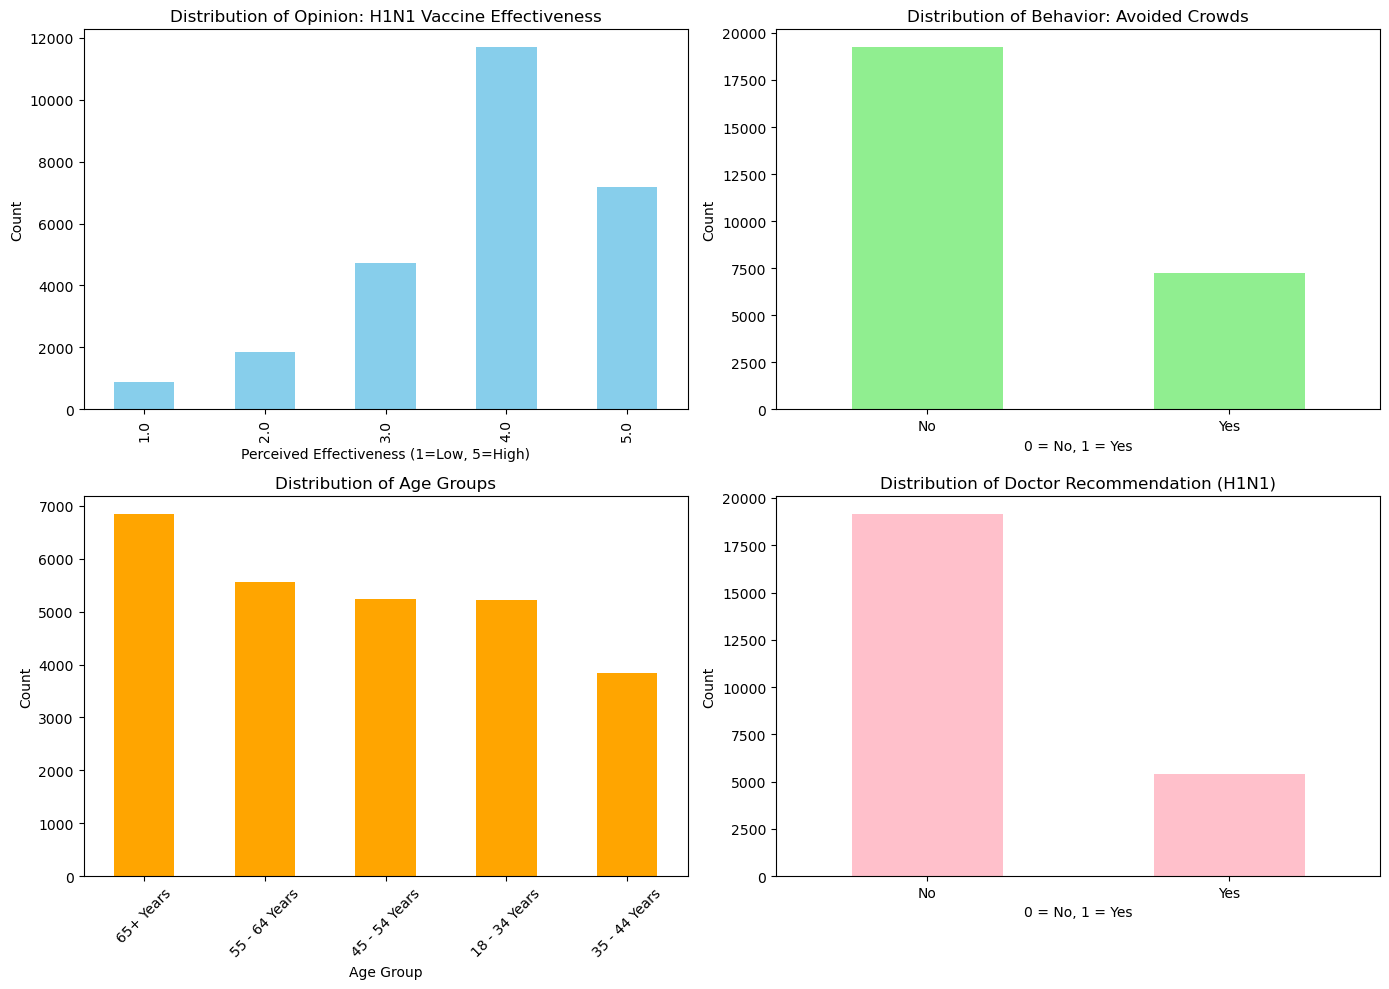

In [15]:
# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Opinion Feature: opinion_h1n1_vacc_effective
df['opinion_h1n1_vacc_effective'].value_counts().sort_index().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Distribution of Opinion: H1N1 Vaccine Effectiveness')
axes[0,0].set_xlabel('Perceived Effectiveness (1=Low, 5=High)')
axes[0,0].set_ylabel('Count')

# 2. Behavioral Feature: behavioral_avoidance
df['behavioral_avoidance'].value_counts().plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Distribution of Behavior: Avoided Crowds')
axes[0,1].set_xlabel('0 = No, 1 = Yes')
axes[0,1].set_ylabel('Count')
axes[0,1].set_xticks([0, 1])
axes[0,1].set_xticklabels(['No', 'Yes'], rotation=0)

# 3. Demographic Feature: age_group
df['age_group'].value_counts().plot(kind='bar', ax=axes[1,0], color='orange')
axes[1,0].set_title('Distribution of Age Groups')
axes[1,0].set_xlabel('Age Group')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Doctor Recommendation: doctor_recc_h1n1
df['doctor_recc_h1n1'].value_counts().plot(kind='bar', ax=axes[1,1], color='pink')
axes[1,1].set_title('Distribution of Doctor Recommendation (H1N1)')
axes[1,1].set_xlabel('0 = No, 1 = Yes')
axes[1,1].set_ylabel('Count')
axes[1,1].set_xticks([0, 1])
axes[1,1].set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.show()

#### Observations on Key Features:

- **Opinion:** The distribution of `opinion_h1n1_vacc_effective` is left-skewed. Most people believe the vaccine is somewhat to very effective (scores 3-5), and a small portion has low perceived effectiveness (scores 1-2).

- **Behaviour:** A majority of respondents `behavioral_avoidance` majority of respondents reported that they did not avoid crowds

- **Demographic:** The age_group distribution is fairly balanced, with a good representation from all adult age brackets. The "65+ Years" group is the largest.Demographic, followed by those in the 55–64 years range, while the 35–44 years group is the smallest.

- **Doctor's Recommendation:** Most people did not receive a doctor's recommendation for the H1N1 vaccine `doctor_recc_h1n1`. This is a key potential barrier.

#### Bi-variate analysis

**Features vs. Target:**

- Analyzing how some of these key features relate to the target variable `h1n1_vaccine`.

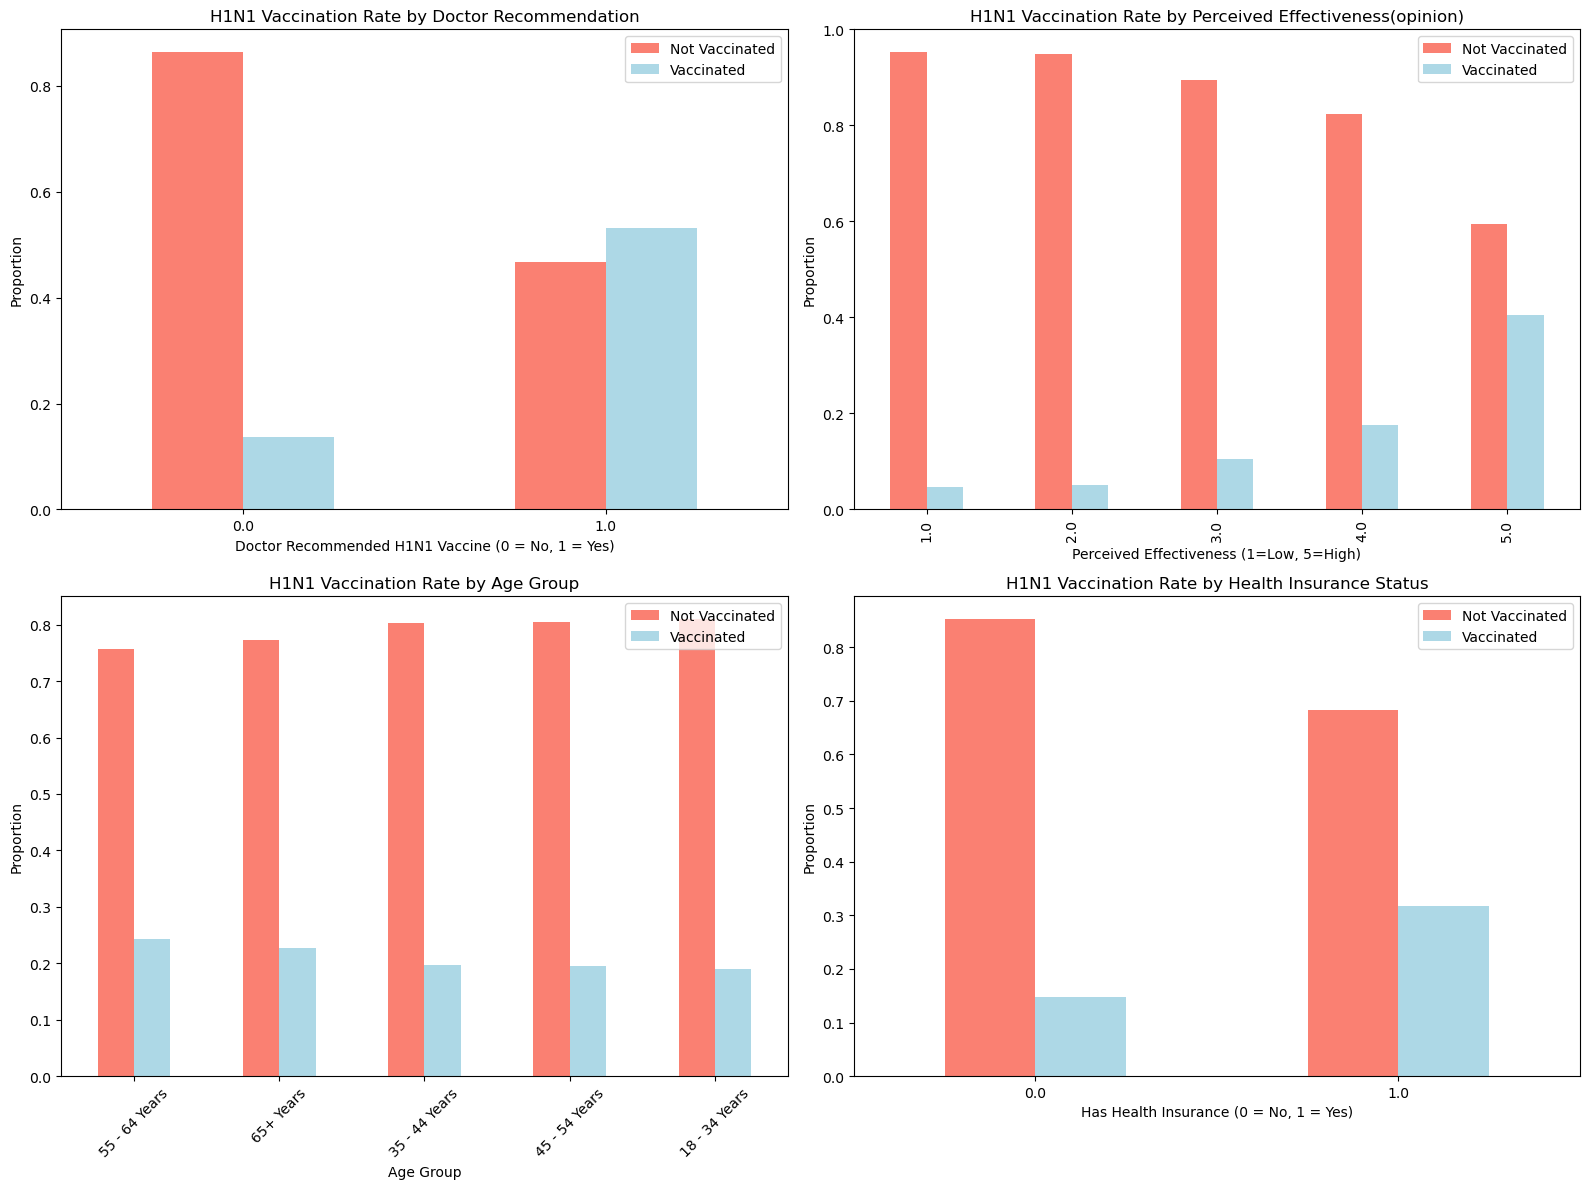

In [16]:
# Analyze the relationship between key features and H1N1 vaccination
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Doctor's Recommendation vs. Vaccination
pd.crosstab(df['doctor_recc_h1n1'], df['h1n1_vaccine'], normalize='index').plot(kind='bar', ax=axes[0,0], color=['salmon', 'lightblue'])
axes[0,0].set_title('H1N1 Vaccination Rate by Doctor Recommendation')
axes[0,0].set_xlabel('Doctor Recommended H1N1 Vaccine (0 = No, 1 = Yes)')
axes[0,0].set_ylabel('Proportion')
axes[0,0].legend(['Not Vaccinated', 'Vaccinated'])
axes[0,0].tick_params(axis='x', rotation=0)

# 2. Opinion on Effectiveness vs. Vaccination
pd.crosstab(df['opinion_h1n1_vacc_effective'], df['h1n1_vaccine'], normalize='index').plot(kind='bar', ax=axes[0,1], color=['salmon', 'lightblue'])
axes[0,1].set_title('H1N1 Vaccination Rate by Perceived Effectiveness(opinion)')
axes[0,1].set_xlabel('Perceived Effectiveness (1=Low, 5=High)')
axes[0,1].set_ylabel('Proportion')
axes[0,1].legend(['Not Vaccinated', 'Vaccinated'])

# 3. Age Group vs. Vaccination
pd.crosstab(df['age_group'], df['h1n1_vaccine'], normalize='index').sort_values(by=1, ascending=False).plot(kind='bar', ax=axes[1,0], color=['salmon', 'lightblue'])
axes[1,0].set_title('H1N1 Vaccination Rate by Age Group')
axes[1,0].set_xlabel('Age Group')
axes[1,0].set_ylabel('Proportion')
axes[1,0].legend(['Not Vaccinated', 'Vaccinated'])
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Health Insurance vs. Vaccination
pd.crosstab(df['health_insurance'], df['h1n1_vaccine'], normalize='index').plot(kind='bar', ax=axes[1,1], color=['salmon', 'lightblue'])
axes[1,1].set_title('H1N1 Vaccination Rate by Health Insurance Status')
axes[1,1].set_xlabel('Has Health Insurance (0 = No, 1 = Yes)')
axes[1,1].set_ylabel('Proportion')
axes[1,1].legend(['Not Vaccinated', 'Vaccinated'])
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

#### Observations on relationships between key features and the target variable

- `doctor_recc_h1n1`: This is likely the most important factor. People who received a doctor’s advice were much more likely to get vaccinated, while those without a recommendation rarely did. This shows the strong influence of healthcare providers.

- `opinion_h1n1_vacc_effective`: Vaccination rates rose clearly when people believed the vaccine was effective. This shows the need to fight misinformation and build public confidence in vaccines.

- `Age Group:` Older adults, especially those aged 65 and above, had higher vaccination rates compared to younger adults. This reflects risk-based behavior since older people face more health risks from the flu.

- `health_insurance`: People with health insurance were more likely to be vaccinated than those without. This suggests that access to healthcare plays an important role in vaccination.

# Data Preparation

## Data Cleaning

In [17]:
# Check for duplicates
df.duplicated().sum()

0

- No duplicate rows were found, so no action was needed.

In [18]:
# Analyze missing values pattern
df.isna().sum().to_frame().sort_values(0,ascending = False)

,0
employment_occupation,13470
employment_industry,13330
health_insurance,12274
income_poverty,4423
doctor_recc_h1n1,2160
doctor_recc_seasonal,2160
rent_or_own,2042
employment_status,1463
marital_status,1408
education,1407


- Many columns have a few hundred missing entries this is manageable.
- Columns that have extreme null values are:
    - `employment_industry` and `employment_occupation` are each missing over 13,000 entries around 50% of the data
    - `health_insurance`is missing 12,274 entries that is around 46% of the data.
    - `income_poverty` is missing over 4,400 entries
    -  `doctor_recc_h1n1` and `doctor_recc_seasonal` are missing over 2,100 entries each.
- We’ll need a smart way to fill in the missing values, because deleting those rows would throw away a lot of useful data.

Handle missing values based on our analysis:

- Droping columns with >40% missing data `employment_industry`, `employment_occupation`
- For other columns, we will use appropriate replacement median for numerical, mode for categorical

In [19]:
# Droping columns with high missing values
df_clean = df.drop(columns=['employment_industry', 'employment_occupation', 'health_insurance'])

In [20]:
# replacing missing numerical values with median
numerical_cols = df_clean.select_dtypes(include=['float64']).columns

for col in numerical_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

In [21]:
# replacing missing categorical features with mode
categorical_cols = df_clean.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

In [22]:
# Verify no missing values remain
df_clean.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

- **Duplicate Rows:** No duplicate rows were found, so we left it as it is.

- **Columns with high missing values:** `health_insurance`, `employment_industry` and `employment_occupation` had more than 40% missing data. These columns were dropped as imputing them would introduce significant bias and another reason is that these columns were not considered critical predictors based on our EDA.

- **Other Numerical Features:** Missing values were filled with the median, because outliers does not affect it.

- **Categorical Features:** Missing values were filled with the mode (the most frequent category) to maintain the distribution.


## Feature Engineering & Selection

In this step we have created new features and removed some old ones.  
As we have seen the dataset contains many columns, and some of them are similar or say the same thing.  
To make our modeling easier especially with Logistic Regression, which works better with fewer and clearer features, we combined related columns into simpler columns

- **Opinion Scores:** Instead of keeping three separate columns about opinions on each vaccine (effectiveness, risk, and fear of side effects), we have combine them into one score. This gives an easy to interpret measure of how positive or negative a person’s opinion is toward vaccination. 

- **Prevention Index:** There are several behavioral columns (washing hands, wearing masks, avoiding crowds). Instead of using each separately, we sum them into one column that shows how many preventive actions a person reported.  

After creating these new combined features, we drop the original columns and identifiers like `respondent_id` so our model will be cleaner, less noisy, and easier to train.


### Opinion Scores
We created **`h1n1_opinion_score`** by combining three columns:  

- **`opinion_h1n1_vacc_effective`** Added perceived effectiveness of the vaccine  
- **`opinion_h1n1_risk`** Added perceived risk of H1N1  
- **`opinion_h1n1_sick_from_vacc`** Subtracted fear of getting sick from the vaccine  

This gives one clear score of a person’s attitude toward the H1N1 vaccine.  
Higher = more positive attitude, Lower = more negative attitude.


In [23]:
# Opinion scores (higher = one thinks vaccine is good + risk of h1n1 is high, lower if afraid of getting sick from vaccine)
df_clean['h1n1_opinion_score'] = (
    df_clean['opinion_h1n1_vacc_effective']
    + df_clean['opinion_h1n1_risk']
    - df_clean['opinion_h1n1_sick_from_vacc']
)
df_clean['h1n1_opinion_score'].value_counts()

h1n1_opinion_score
 4.0    7566
 5.0    4844
 3.0    4012
 2.0    3112
 6.0    1981
 1.0    1827
 7.0    1119
 8.0     837
 0.0     633
-1.0     284
 9.0     260
-2.0     156
-3.0      76
Name: count, dtype: int64

### Prevention Index
We created **`prevention_index`** by adding up all the preventive behaviors (like wearing a mask, washing hands, avoiding crowds, etc)  

This gives one number that shows how many safety steps a person takes:  
- Higher value = more preventive behaviors  
- Lower value = fewer preventive behaviors  


In [24]:
# Prevention index = how many preventive behaviors a person reports
behavioral_cols = [
    'behavioral_antiviral_meds',
    'behavioral_avoidance',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_large_gatherings',
    'behavioral_outside_home',
    'behavioral_touch_face',
]
df_clean['prevention_index'] = df_clean[behavioral_cols].sum(axis=1)

df_clean['prevention_index'].value_counts()

prevention_index
3.0    7331
2.0    4568
5.0    4546
4.0    4335
1.0    2656
0.0    2060
6.0    1040
7.0     171
Name: count, dtype: int64

### Dropping some features
We dropped some columns before modeling:  

- **IDs** like `respondent_id` - not useful for prediction.  
- **Original doctor, opinion, and behavior columns** - already combined into simpler features.  
- **Geography codes** - anonymized and not meaningful for this analysis.  
- **Target column** `h1n1_vaccine` - this is what we want to predict, not an input.
  
- **`seasonal_vaccine`** column is dropped because:  
    - Our main goal is to take on the **greater challenge of class imbalance** only 21% got the H1N1 vaccine as seen while doing EDA.   

This leaves us with a cleaner feature set of `X` that is easier for the model to use.  


In [25]:
# Picking features for modeling, dropping IDs and things we replaced

# Columns we don't want to use as features:
# - respondent_id: just an ID
# - original doctor/opinion/behavior columns: replaced by our simpler combined features
# - some geography codes that are anonymized and not easy to explain here
drop_columns = [
    'respondent_id',
    'doctor_recc_h1n1',
    'doctor_recc_seasonal',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'hhs_geo_region',
    'census_msa',
] + behavioral_cols

# Building X by dropping the columns above and the target column and 'seasonal_vaccine'
X = df_clean.drop(columns=drop_columns + ["h1n1_vaccine", "seasonal_vaccine"])

X.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'age_group', 'education',
       'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own',
       'employment_status', 'household_adults', 'household_children',
       'h1n1_opinion_score', 'prevention_index'],
      dtype='object')

In [26]:

# Build y target
y_h1n1 = df_clean["h1n1_vaccine"]

y_h1n1

0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

##  Train-Test Split

We split the data into **training (80%)** and **testing (20%)** sets.  
- We used **stratified sampling**, which means the split keeps the same class balance (vaccinated vs. not vaccinated) in both sets.  
- This is important because our target (`h1n1_vaccine`) is **highly imbalanced**.  
- Without stratification, one set might have too few vaccinated cases, making training or evaluation unreliable.  

Now we can train the model on the training set and fairly test it on the hold-out test set.  


In [27]:
from sklearn.model_selection import train_test_split

# Performing stratified split for H1N1 target
X_train, X_test, y_train, y_test = train_test_split(X, y_h1n1, test_size=0.2, random_state=42, stratify=y_h1n1)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Class distribution in training set: {pd.Series(y_train).value_counts(normalize = True).values}")
print(f"Class distribution in test set: {pd.Series(y_test).value_counts(normalize = True).values}")

Training set: 21365 samples
Test set: 5342 samples
Class distribution in training set: [0.78754973 0.21245027]
Class distribution in test set: [0.78753276 0.21246724]


## Preprocessing

We will clean and prepare the features so they can be used in modeling:  
- Fill missing values (median for numbers, most frequent for categories).  
- Scale numerical features.  
- One-hot encode categorical features.  
- Fit transformations on training data only to avoid data leakage.  


### Identfying Column Types  

We will separate the features into two groups:  
- **Numerical columns** (integers and floats)  
- **Categorical columns** (object)  

This will help us apply the right preprocessing steps to each group, for numerical we will scale them and for catergorical we will hot-encode them


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Finding numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

### Numerical Features Preprocessing  

For numerical columns:  
- We will fill missing values using the **median**. we had already done this but will do it again to catch any remaining missing values 
- Scale values using **StandardScaler** so all numbers are on the same range.  


In [29]:
# Filling missing values with the median
# Scaling them so they are on the same range
num_imputer = SimpleImputer(strategy='median') #*
scaler = StandardScaler()

### Categorical Features Preprocessing  

For categorical columns:  
- Filling missing values with the **most frequent category (mode)**.we had already done this but will do it again to catch any remaining missing values
- Convert categories into **0/1 columns** using One-Hot Encoding.  


In [30]:
# Fill missing values with the most frequent (most common)
# Convert categories into 0/1 columns
cat_imputer = SimpleImputer(strategy='most_frequent')
onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

### Combining the Preprocessing Steps  

We use **ColumnTransformer** to apply:  
- `StandardScaler` to all numerical columns.  
- `OneHotEncoder` to all categorical columns.  

This builds one preprocessor that handles both types in a single step.  

In [31]:
# ColumnTransformer applies the right steps to each column type
preprocessor = ColumnTransformer(transformers=[
                                            ('num', StandardScaler(), numerical_cols),
                                            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
                                                ])

### Fitting training data and transforming Train and Test Data  

- The preprocessor is fitted only on the training data to prevent data leakage
- Then we use it to transform both **train** and **test**.  
This way, the model sees data that’s been cleaned and prepared in the same way, while preventing data leakage.  


In [32]:
# Fitting only on training data
preprocessor.fit(X_train)

# Transforming train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### Getting Final Feature Names
- Feature names are preserved after one-hot encoding for interpretability 


In [33]:
# Getting final feature names
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, onehot_columns])

### Creating DataFrames  
- We converted the processed NumPy arrays back into Pandas DataFrames, adding the correct feature names and row indexes.  
- This makes the data easier to explore and understand before modeling. 

In [34]:
# Created DataFrames for easier inspection
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_feature_names, index=X_test.index)
X_train_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21365 entries, 20417 to 26118
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   h1n1_concern                              21365 non-null  float64
 1   h1n1_knowledge                            21365 non-null  float64
 2   chronic_med_condition                     21365 non-null  float64
 3   child_under_6_months                      21365 non-null  float64
 4   health_worker                             21365 non-null  float64
 5   household_adults                          21365 non-null  float64
 6   household_children                        21365 non-null  float64
 7   h1n1_opinion_score                        21365 non-null  float64
 8   prevention_index                          21365 non-null  float64
 9   age_group_18 - 34 Years                   21365 non-null  float64
 10  age_group_35 - 44 Years            

In [35]:
X_train_processed_df.head()

,h1n1_concern,h1n1_knowledge,chronic_med_condition,child_under_6_months,health_worker,household_adults,household_children,h1n1_opinion_score,prevention_index,age_group_18 - 34 Years,...,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed
20417,-0.678479,1.195592,-0.612386,-0.295615,-0.345468,0.155010,0.497857,-0.428778,-1.277018,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
13969,0.422015,1.195592,1.632958,-0.295615,-0.345468,-1.177164,-0.576776,1.107246,0.598867,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
24930,0.422015,1.195592,-0.612386,-0.295615,2.894623,1.487184,0.497857,1.619254,0.598867,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
15420,0.422015,-0.423052,-0.612386,-0.295615,-0.345468,0.155010,1.572491,0.595238,-1.277018,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
10998,0.422015,-0.423052,-0.612386,-0.295615,-0.345468,0.155010,-0.576776,0.595238,-0.651723,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


# Modelling

## Logistic Regression

In [37]:
# handling imbalance in classes by using SMOTE to generate new sample data by creating
#'synthetic' examples that are combinations of the closest minority class cases.

from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed_df, y_train) 

print(pd.Series(y_train_resampled).value_counts()) 


h1n1_vaccine
0    16826
1    16826
Name: count, dtype: int64


In [38]:
# first model: Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=42)
model_log = logreg.fit(X_train_resampled, y_train_resampled)
model_log

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [41]:
y_pred_logreg = logreg.predict(X_test_processed)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

print(classification_report(y_test, y_pred_logreg, target_names=['Not Vaccinated', 'Vaccinated']))
print(f"ROC-AUC Score: {roc_auc_score(y_test, logreg.predict_proba(X_test_processed)[:, 1]):.4f}")


                precision    recall  f1-score   support

Not Vaccinated       0.87      0.69      0.77      4207
    Vaccinated       0.35      0.63      0.45      1135

      accuracy                           0.68      5342
     macro avg       0.61      0.66      0.61      5342
  weighted avg       0.76      0.68      0.70      5342

ROC-AUC Score: 0.7236


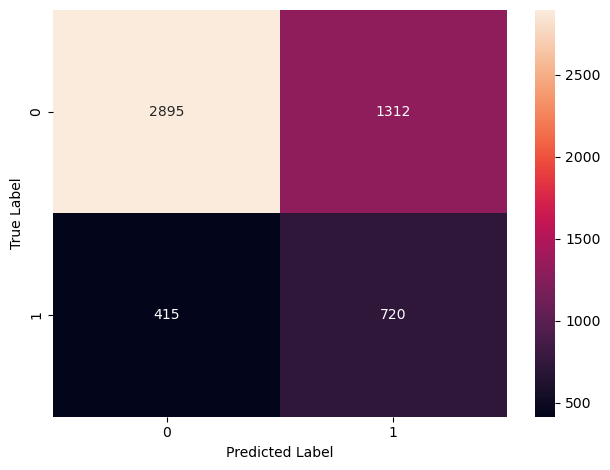

In [65]:
# import the confusion_matrix function
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, RocCurveDisplay

# define the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logreg)

# plot the confusion matrix
sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d'
        
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


### Hyperparameter tuning of the Log Reg Model

In [47]:
# defining the model
logreg_sec = LogisticRegression(class_weight='balanced', random_state=42)

# Defining parameter grid for Logistic Regression
logreg_param_grid = {
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'C': [0.01, 0.1, 1, 10, 100]
}

In [50]:
from sklearn.model_selection import GridSearchCV

# Set up GridSearchCV for Logistic Regression
logreg_grid_search = GridSearchCV(
    estimator=logreg_sec,
    param_grid=logreg_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

logreg_grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best estimator
print("\nBest Parameters found by GridSearchCV for Logistic Regression:")
print(logreg_grid_search.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters found by GridSearchCV for Logistic Regression:
{'C': 0.1, 'solver': 'liblinear'}


In [51]:
best_logreg_clf = logreg_grid_search.best_estimator_

In [52]:
# Evaluate Tuned Logistic Regression
print("\n--- Tuned Logistic Regression Performance on Test Set ---")
y_pred_logreg_tuned = best_logreg_clf.predict(X_test_processed)
print(classification_report(y_test, y_pred_logreg_tuned, target_names=['Not Vaccinated', 'Vaccinated']))
print(f"ROC-AUC Score: {roc_auc_score(y_test, best_logreg_clf.predict_proba(X_test_processed)[:, 1]):.4f}")


--- Tuned Logistic Regression Performance on Test Set ---
                precision    recall  f1-score   support

Not Vaccinated       0.87      0.69      0.77      4207
    Vaccinated       0.35      0.63      0.45      1135

      accuracy                           0.68      5342
     macro avg       0.61      0.66      0.61      5342
  weighted avg       0.76      0.68      0.70      5342

ROC-AUC Score: 0.7236


## Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier 

tree = DecisionTreeClassifier(random_state = 42)

tree.fit(X_train_resampled, y_train_resampled)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [45]:
y_pred_tree = tree.predict(X_test_processed)

In [46]:
print(classification_report(y_test, y_pred_tree, target_names=['Not Vaccinated', 'Vaccinated']))
print(f"ROC-AUC Score: {roc_auc_score(y_test, tree.predict_proba(X_test_processed)[:, 1]):.4f}")

                precision    recall  f1-score   support

Not Vaccinated       0.82      0.80      0.81      4207
    Vaccinated       0.32      0.34      0.33      1135

      accuracy                           0.70      5342
     macro avg       0.57      0.57      0.57      5342
  weighted avg       0.71      0.70      0.71      5342

ROC-AUC Score: 0.5701


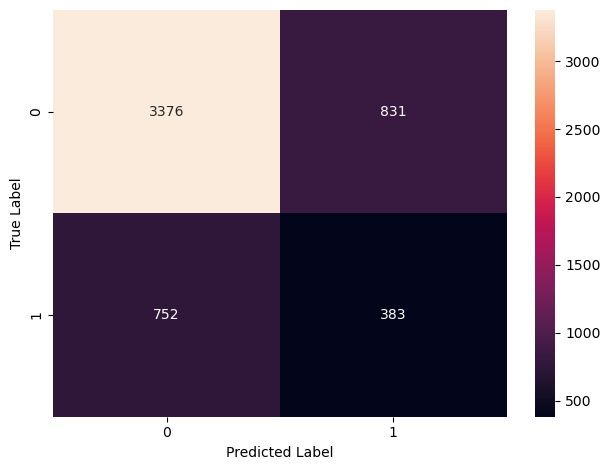

In [66]:
# define the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tree)

# plot the confusion matrix
sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d'
        
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

### HyperParameter tuning of the Dec Tree Model

In [53]:
dt_clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_param_grid = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [54]:
# Set up GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(
    estimator=dt_clf,
    param_grid=dt_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fitting the training data on the grid search
dt_grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [55]:
print("\nBest Parameters found by GridSearchCV for Decision Tree:")
print(dt_grid_search.best_params_)


Best Parameters found by GridSearchCV for Decision Tree:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [56]:
best_dt_clf = dt_grid_search.best_estimator_


In [57]:
y_pred_dt_tuned = best_dt_clf.predict(X_test_processed)
print(classification_report(y_test, y_pred_dt_tuned, target_names=['Not Vaccinated', 'Vaccinated']))
print(f"ROC-AUC Score: {roc_auc_score(y_test, best_dt_clf.predict_proba(X_test_processed)[:, 1]):.4f}")


                precision    recall  f1-score   support

Not Vaccinated       0.82      0.83      0.82      4207
    Vaccinated       0.33      0.32      0.33      1135

      accuracy                           0.72      5342
     macro avg       0.58      0.57      0.57      5342
  weighted avg       0.72      0.72      0.72      5342

ROC-AUC Score: 0.5756
